# Data preprocessing and split

In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.13.0


In [416]:
data = pd.read_csv('/Users/ujong-yun/Documents/학부연구생/학부연구생 - dataset 공유 (csv).csv')
data.dropna()
regression_data = data.loc[data['Knocking'] == 0]
regression_data

,Case,Engine Speed,Spark Timing,Throttle Angle,Ambient Temperature,Intake Pressure,Intake Temperature,Exhaust Pressure,Exhaust Temperature,Injected Mass,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO,Knocking Index,Knocking
547,546.0,2000,-10,30,283,0.975,288.8,1.069,858.7,36.89,39.8,27.96,1.33,8.67,10.1,307.4,2.91,222.7,0.0,0.0
548,547.0,2000,-10,30,293,0.974,295.5,1.068,858.6,36.61,39.5,27.48,1.32,8.6,9.98,307.2,2.99,220.9,0.0,0.0
549,548.0,2000,-10,30,303,0.974,302.3,1.067,858.1,36.35,39.2,27.62,1.31,8.53,9.86,307.5,3.03,221.4,0.0,0.0
550,549.0,2000,-10,35,283,0.982,288.8,1.07,861.2,37.35,40.9,27.25,1.39,8.82,10.31,304.4,3.23,215.2,0.0,0.0
551,550.0,2000,-10,35,293,0.982,295.6,1.069,858.9,37.1,40.6,27.41,1.39,8.75,10.19,306.1,3.09,221.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2140.0,6000,-10,85,293,0.969,294.1,1.493,1088.4,48.07,33.1,36.97,0.78,8.13,10.29,426,1.73,403,0.0,0.0
2142,2141.0,6000,-10,85,303,0.969,301.6,1.488,1089.5,47.74,33.3,36.99,0.78,8.08,10.27,425.9,1.81,402.8,0.0,0.0
2143,2142.0,6000,-10,90,283,0.97,286.6,1.498,1088.9,48.4,32.9,37.96,0.78,8.2,10.31,424.8,1.72,399.2,0.0,0.0
2144,2143.0,6000,-10,90,293,0.969,294.1,1.493,1088.5,48.08,33.1,36.97,0.78,8.14,10.29,425.9,1.74,402.7,0.0,0.0


In [417]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Case                             1064 non-null   float64
 1   Engine Speed                     1064 non-null   object 
 2   Spark Timing                     1064 non-null   object 
 3   Throttle Angle                   1064 non-null   object 
 4   Ambient Temperature              1064 non-null   object 
 5   Intake Pressure                  1064 non-null   object 
 6   Intake Temperature               1064 non-null   object 
 7   Exhaust Pressure                 1064 non-null   object 
 8   Exhaust Temperature              1064 non-null   object 
 9   Injected Mass                    1064 non-null   object 
 10  Maximum Pressure                 1064 non-null   object 
 11  Crank Angle at Maximum Pressure  1064 non-null   object 
 12  Maximum Rate of Pressur

In [418]:
input_data = regression_data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9]]
input_data
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Engine Speed         1064 non-null   object
 1   Spark Timing         1064 non-null   object
 2   Throttle Angle       1064 non-null   object
 3   Ambient Temperature  1064 non-null   object
 4   Intake Pressure      1064 non-null   object
 5   Intake Temperature   1064 non-null   object
 6   Exhaust Pressure     1064 non-null   object
 7   Exhaust Temperature  1064 non-null   object
 8   Injected Mass        1064 non-null   object
dtypes: object(9)
memory usage: 83.1+ KB


In [419]:
output_data = regression_data.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17]]
output_data
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Maximum Pressure                 1064 non-null   object
 1   Crank Angle at Maximum Pressure  1064 non-null   object
 2   Maximum Rate of Pressure Rise    1064 non-null   object
 3   BMEP                             1064 non-null   object
 4   IMEP                             1064 non-null   object
 5   BSFC                             1064 non-null   object
 6   BSNOx                            1064 non-null   object
 7   BSCO                             1064 non-null   object
dtypes: object(8)
memory usage: 74.8+ KB


In [420]:
input_data=input_data.astype('float')
output_data = output_data.astype('float')
input_data.info()
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Engine Speed         1064 non-null   float64
 1   Spark Timing         1064 non-null   float64
 2   Throttle Angle       1064 non-null   float64
 3   Ambient Temperature  1064 non-null   float64
 4   Intake Pressure      1064 non-null   float64
 5   Intake Temperature   1064 non-null   float64
 6   Exhaust Pressure     1064 non-null   float64
 7   Exhaust Temperature  1064 non-null   float64
 8   Injected Mass        1064 non-null   float64
dtypes: float64(9)
memory usage: 83.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Maximum Pressure                 1064 non-null   float64
 1   Crank Angle 

In [421]:
train_input, test_input, train_output, test_output = train_test_split(input_data, output_data, test_size=0.2, shuffle = True, random_state=42)
train_input, val_input, train_output, val_output = train_test_split(train_input, train_output, test_size = 0.1, shuffle=True, random_state=42)
print(train_input.shape, train_output.shape)
print(val_input.shape, val_output.shape)
print(test_input.shape, test_output.shape)


(765, 9) (765, 8)
(86, 9) (86, 8)
(213, 9) (213, 8)


In [422]:
ss = StandardScaler()
ss.fit(train_input)
train_scale = ss.transform(train_input)
val_scale =  ss.transform(val_input)
test_scale =  ss.transform(test_input)

# DNN Model

In [423]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape = (9, )))
model.add(keras.layers.Dense(128, activation= 'relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation= 'relu'))
model.add(keras.layers.Dense(16, activation= 'relu'))
model.add(keras.layers.Dense(8))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 256)               2560      
                                                                 
 dense_91 (Dense)            (None, 128)               32896     
                                                                 
 dense_92 (Dense)            (None, 64)                8256      
                                                                 
 dense_93 (Dense)            (None, 32)                2080      
                                                                 
 dense_94 (Dense)            (None, 16)                528       
                                                                 
 dense_95 (Dense)            (None, 8)                 136       
                                                                 
Total params: 46456 (181.47 KB)
Trainable params: 464

In [424]:
callback = keras.callbacks.EarlyStopping(monitor = 'loss', patience=10, verbose=True)
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss = 'mse', metrics=['mae', 'mse'])
history = model.fit(train_scale, train_output, validation_data=(val_scale, val_output) ,epochs=500, callbacks=[callback])

Epoch 1/500
24/24 [==============================] - 0s 6ms/step - loss: 24555.2715 - mae: 89.6457 - mse: 24555.2715 - val_loss: 24044.5586 - val_mae: 91.0244 - val_mse: 24044.5586
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 15031.2910 - mae: 81.6274 - mse: 15031.2910 - val_loss: 5168.1245 - val_mae: 58.0852 - val_mse: 5168.1245
Epoch 3/500
24/24 [==============================] - 0s 3ms/step - loss: 2308.6980 - mae: 33.6447 - mse: 2308.6980 - val_loss: 860.9349 - val_mae: 17.7262 - val_mse: 860.9349
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 641.3683 - mae: 14.9827 - mse: 641.3683 - val_loss: 486.5072 - val_mae: 12.2989 - val_mse: 486.5072
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 407.9879 - mae: 11.0906 - mse: 407.9879 - val_loss: 341.8617 - val_mae: 10.1392 - val_mse: 341.8617
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 318.6264 - mae: 9.7716 - mse: 318.6264 - val_l

In [425]:
def plot_history(history):
    hist = history.history
    hist['epochs'] = history.epoch

    fig, axes = plt.subplots(1, 3, constrained_layout = True, figsize = (10, 5))
    axes[0].plot(hist['epochs'], hist['loss'], label = 'Training_loss')
    axes[0].plot(hist['epochs'], hist['val_loss'], label = 'val_loss')
    axes[1].plot(hist['epochs'], hist['mae'], label = 'Training_mae')
    axes[1].plot(hist['epochs'], hist['val_mae'], label = 'val_mae')
    axes[2].plot(hist['epochs'], hist['mse'], label = 'Training_mse')
    axes[2].plot(hist['epochs'], hist['val_mse'], label = 'val_mse')
    axes[0].set_title('Training and validation loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[1].set_title('Training and validation mae')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('MAE')
    axes[2].set_title('Training and validation mse')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('MSE')
    axes[0].legend()
    axes[1].legend()
    axes[2].legend()
    plt.show()
    


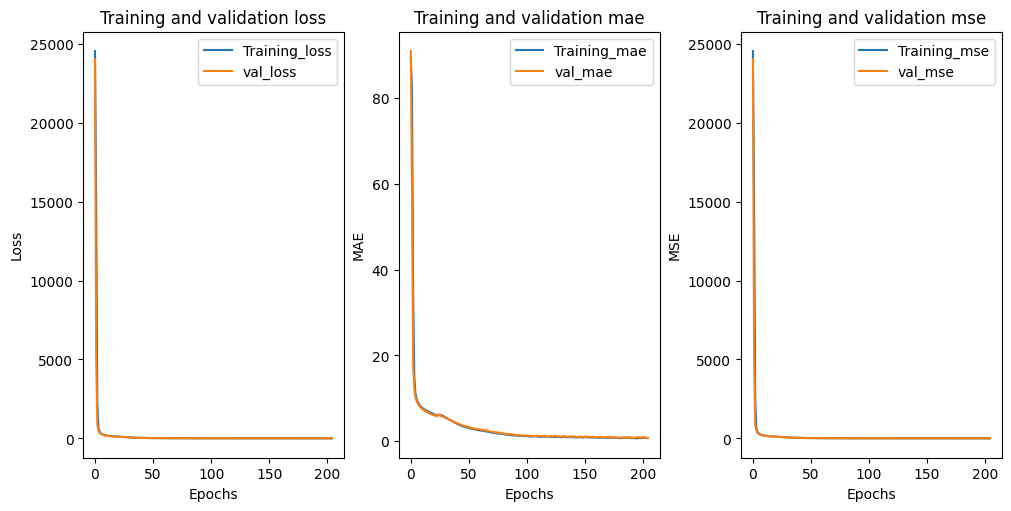

In [426]:
plot_history(history)

In [427]:
model.evaluate(test_scale, test_output)

7/7 [==============================] - 0s 928us/step - loss: 1.2705 - mae: 0.6971 - mse: 1.2705


[1.2704626321792603, 0.6970919966697693, 1.2704626321792603]

In [428]:
predicted = model.predict(test_scale)

7/7 [==============================] - 0s 761us/step


In [429]:
predicted_df = pd.DataFrame(predicted)
predicted_df

,0,1,2,3,4,5,6,7
0,40.457352,27.862183,1.701955,9.234591,10.045348,303.512604,3.751552,218.313980
1,32.917488,38.731327,0.643505,8.440179,10.815610,427.802216,1.441858,404.291412
2,65.155884,18.565784,2.811960,11.554894,13.783991,295.560699,5.321622,241.699142
3,38.151859,34.211327,0.640561,9.023904,12.102023,374.832733,2.709252,339.949280
4,60.328751,19.950630,2.348196,10.220371,12.766624,337.493103,4.211621,319.349243
...,...,...,...,...,...,...,...,...
208,52.095665,25.107616,1.693747,10.216680,12.870711,323.635254,4.196776,280.299103
209,48.848705,22.926407,2.239756,9.646533,10.811194,289.679871,4.274444,209.694687
210,41.020481,28.404982,1.679847,9.455678,10.435984,307.814026,3.872577,227.442673
211,41.293182,29.187126,1.334016,8.526936,10.691822,377.755646,2.404917,361.091492


In [443]:
predicted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Maximum Pressure(predicted)                 213 non-null    float32
 1   Crank Angle at Maximum Pressure(predicted)  213 non-null    float32
 2   Maximum Rate of Pressure Rise(predicted)    213 non-null    float32
 3   BMEP(predicted)                             213 non-null    float32
 4   IMEP(predicted)                             213 non-null    float32
 5   BSFC(predicted)                             213 non-null    float32
 6   BSNOx(predicted)                            213 non-null    float32
 7   BSCO(predicted)                             213 non-null    float32
dtypes: float32(8)
memory usage: 6.8 KB


In [430]:
predicted_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']
predicted_df

,Maximum Pressure(predicted),Crank Angle at Maximum Pressure(predicted),Maximum Rate of Pressure Rise(predicted),BMEP(predicted),IMEP(predicted),BSFC(predicted),BSNOx(predicted),BSCO(predicted)
0,40.457352,27.862183,1.701955,9.234591,10.045348,303.512604,3.751552,218.313980
1,32.917488,38.731327,0.643505,8.440179,10.815610,427.802216,1.441858,404.291412
2,65.155884,18.565784,2.811960,11.554894,13.783991,295.560699,5.321622,241.699142
3,38.151859,34.211327,0.640561,9.023904,12.102023,374.832733,2.709252,339.949280
4,60.328751,19.950630,2.348196,10.220371,12.766624,337.493103,4.211621,319.349243
...,...,...,...,...,...,...,...,...
208,52.095665,25.107616,1.693747,10.216680,12.870711,323.635254,4.196776,280.299103
209,48.848705,22.926407,2.239756,9.646533,10.811194,289.679871,4.274444,209.694687
210,41.020481,28.404982,1.679847,9.455678,10.435984,307.814026,3.872577,227.442673
211,41.293182,29.187126,1.334016,8.526936,10.691822,377.755646,2.404917,361.091492
